In [1]:
import os
import pandas as pd
from IPython.display import Audio
import numpy as np
import pydub
from pydub.playback import play
import pickle
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from collections import Counter

x = [1, 0, 2, 3]

counts = Counter(x)
m = counts.most_common(2)
print(m)

if m[0][1] == m[1][1]:
    print('tie')
else:
    print('not tie')

[(1, 1), (0, 1)]
tie


In [2]:
with open('logs.txt', 'r') as f:
    lines = f.readlines()
    lines = [float(line.strip()) for line in lines]

# lines = lines[]

print(f'Average time: {np.mean(lines)}')
print(f'Min time: {np.min(lines)}')
print(f'Max time: {np.max(lines)}')

# with open('logs.pkl', 'wb') as f:
#     pickle.dump(lines, f)

Average time: 0.8214536249926403
Min time: 0.5500347000779584
Max time: 1.9006331000709906


In [3]:
# classes = [
#   "Angry 😠",
#   "Disgust 🤮",
#   "Fear 😨",
#   "Happy 😃",
#   "Neutral 😐",
#   "Sad 😭",
#   "Surprised 😲",
# ]

# classes = ["🤮😠", "🤮😠", "😲😨", "😃", "😐", "😭", "😲😨"]
classes = ["Angry / Disgust", "Angry / Disgust", "Fear / Surprised", "Happy", "Neutral", "Sad", "Fear / Surprised"]
labels = ["Angry / Disgust", "Fear / Surprised", "Happy", "Sad"]
classes2 = [
    "Angry / Disgust",
    "Fear / Surprised",
    "Happy",
    "Neutral",
    "Sad",
]
print(labels)

['Angry / Disgust', 'Fear / Surprised', 'Happy', 'Sad']


In [30]:
ds = {
    'path': [],
    'vggish': [],
    'vgg16': [],
    'hubert': [],
}

for dir, _, files in os.walk('./runs/'):
    for file in files:
        path = os.path.join(dir, file)
        _, vggish, vgg16, hubert = file.split('_')
        ds['path'].append(path)
        ds['vggish'].append(vggish)
        ds['vgg16'].append(vgg16)
        ds['hubert'].append(hubert.removesuffix('.wav'))

df = pd.DataFrame(ds)
df

,path,vggish,vgg16,hubert
0,./runs/12.31.57_2_4_1.wav,2,4,1
1,./runs/12.31.58_5_5_6.wav,5,5,6
2,./runs/12.32.00_5_6_2.wav,5,6,2
3,./runs/12.32.02_1_0_3.wav,1,0,3
4,./runs/12.32.04_1_0_2.wav,1,0,2
...,...,...,...,...
72,./runs/12.34.34_2_4_4.wav,2,4,4
73,./runs/12.34.36_5_6_3.wav,5,6,3
74,./runs/12.34.39_2_6_2.wav,2,6,2
75,./runs/12.34.40_2_6_6.wav,2,6,6


In [21]:
# import librosa

# rows_to_remove = []

# for idx, row in df.iterrows():
#     y, sr = librosa.load(row['path'], sr=16000)

#     avg_rms = librosa.feature.rms(y=y).mean()

#     if avg_rms < 0.01:
#         rows_to_remove.append(idx)
#     # y, _ = librosa.effects.trim(y, top_db=25)

#     # if len(y) < 14000:
#     #     rows_to_remove.append(idx)




# len(rows_to_remove)

0

In [ ]:
# import time
# for idx in rows_to_remove:
#     print(idx)
#     play(pydub.AudioSegment.from_wav(df.iloc[idx]['path']))

In [27]:
# cln_df = df.drop(rows_to_remove)

In [28]:
# for i in range(20):
#     audio = pydub.AudioSegment.from_file(cln_df['path'].iloc[i])
#     print(i, 'VGGish:', classes[int(cln_df['vggish'].iloc[i])], 'HuBERT:', classes[int(cln_df['hubert'].iloc[i])], end='\r')
#     play(audio)
    
#     # Audio(df['path'].iloc[i])

In [37]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

res = pd.DataFrame(data)
res['hubert'] = res['hubert'].astype(int)
res['vggish'] = res['vggish'].astype(int)
res['vgg16'] = res['vgg16'].astype(int)
res['given_tag'] = res['given_tag'].astype(int)
res['given_tag'].value_counts()

 0    67
 1    11
 4     9
 2     6
 3     4
-1     2
Name: given_tag, dtype: int64

**Four Basic Emotions:** Based on research by Institute of Neuroscience and Psychology at the University of Glasgow, suggests there are only four basic emotions (theatlantic.com)

- Happiness
- Sadness
- Fear/Surprise
- Anger/Disgust

https://youtu.be/b9tQhSmQjVM?t=3247

In [38]:
# make all the 6 into 2
res['vggish'] = res['vggish'].apply(lambda x: 2 if x == 6 else x)
res['vgg16'] = res['vgg16'].apply(lambda x: 2 if x == 6 else x)
res['hubert'] = res['hubert'].apply(lambda x: 2 if x == 6 else x)
res['given_tag'] = res['given_tag'].apply(lambda x: 2 if x == 6 else x)

# make all the 0 into 1
res['vggish'] = res['vggish'].apply(lambda x: 1 if x == 0 else x)
res['vgg16'] = res['vgg16'].apply(lambda x: 1 if x == 0 else x)
res['hubert'] = res['hubert'].apply(lambda x: 1 if x == 0 else x)
res['given_tag'] = res['given_tag'].apply(lambda x: 1 if x == 0 else x)

# remove all row with neutral
res = res[(res['given_tag'] != 4)]
res = res[res['given_tag'] != -1]
res = res[res['hubert'] != 4]
res = res[res['vgg16'] != 4]
res = res[res['vggish'] != 4]

print(res['given_tag'].value_counts())

res['hubert'] = res['hubert'].apply(lambda x: classes[x])
res['vgg16'] = res['vgg16'].apply(lambda x: classes[x])
res['vggish'] = res['vggish'].apply(lambda x: classes[x])
res['given_tag'] = res['given_tag'].apply(lambda x: classes[x])

1    55
2     3
3     1
Name: given_tag, dtype: int64


In [39]:
print(len(res))
res['given_tag'].value_counts()

59


Angry / Disgust     55
Fear / Surprised     3
Happy                1
Name: given_tag, dtype: int64

c:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


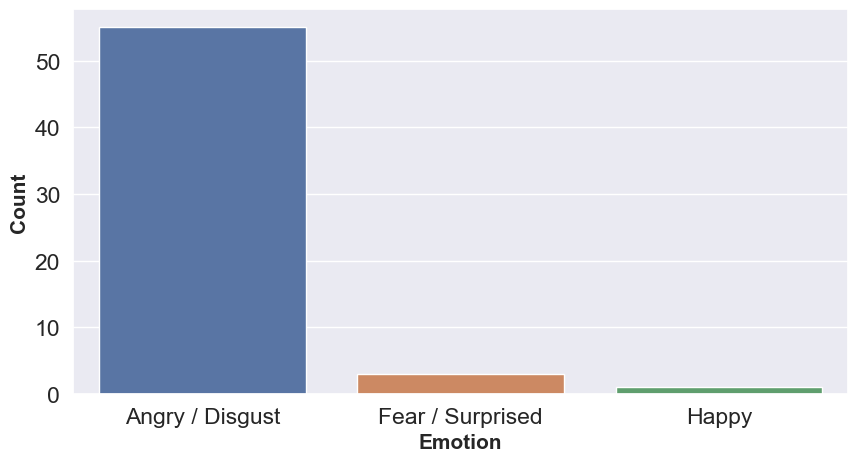

In [40]:
ax = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.5)
sns.countplot(res['given_tag'])
# X label
plt.xlabel('Emotion', fontweight='bold', fontsize=15)
# Y label
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.show()

In [41]:
print(classification_report(res['given_tag'], res['hubert'], digits=6, zero_division=0))

                  precision    recall  f1-score   support

 Angry / Disgust   0.875000  0.127273  0.222222        55
Fear / Surprised   0.000000  0.000000  0.000000         3
           Happy   0.000000  0.000000  0.000000         1
             Sad   0.000000  0.000000  0.000000         0

        accuracy                       0.118644        59
       macro avg   0.218750  0.031818  0.055556        59
    weighted avg   0.815678  0.118644  0.207156        59



<AxesSubplot:>

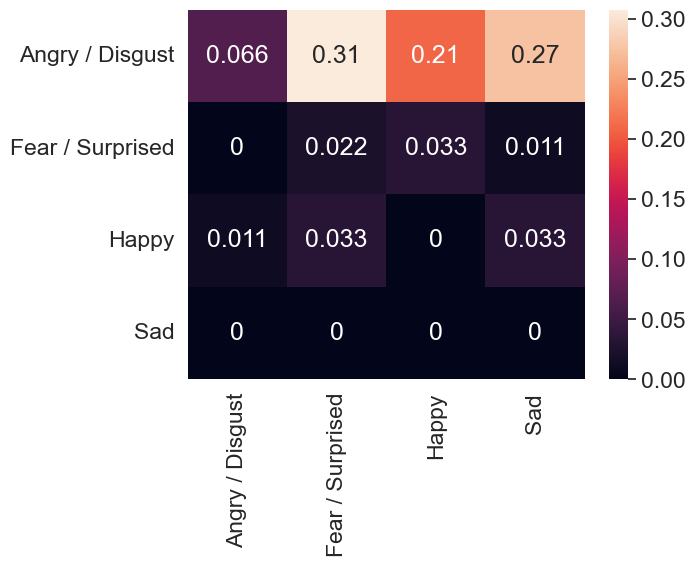

In [12]:
cm = confusion_matrix(res['given_tag'], res['hubert'], labels=labels, normalize='all')
sns.heatmap(cm, annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels)

In [35]:
print(classification_report(res['given_tag'], res['vggish'], digits=6, zero_division=0, target_names=labels))

                  precision    recall  f1-score   support

 Angry / Disgust   1.000000  0.500000  0.666667         2
Fear / Surprised   0.250000  0.428571  0.315789         7
           Happy   0.000000  0.000000  0.000000        12
             Sad   0.000000  0.000000  0.000000         0

        accuracy                       0.190476        21
       macro avg   0.312500  0.232143  0.245614        21
    weighted avg   0.178571  0.190476  0.168755        21



<AxesSubplot:>

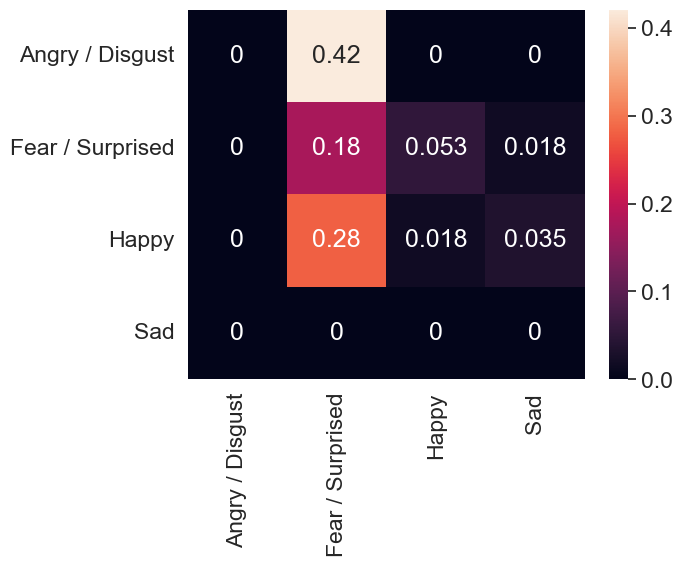

In [25]:
cm = confusion_matrix(res['given_tag'], res['vggish'], labels=labels, normalize='all')
sns.heatmap(cm, annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels)

                  precision    recall  f1-score   support

 Angry / Disgust   1.000000  0.054545  0.103448        55
Fear / Surprised   0.037037  0.666667  0.070175         3
           Happy   0.000000  0.000000  0.000000         1

        accuracy                       0.084746        59
       macro avg   0.345679  0.240404  0.057875        59
    weighted avg   0.934087  0.084746  0.100003        59



<AxesSubplot:>

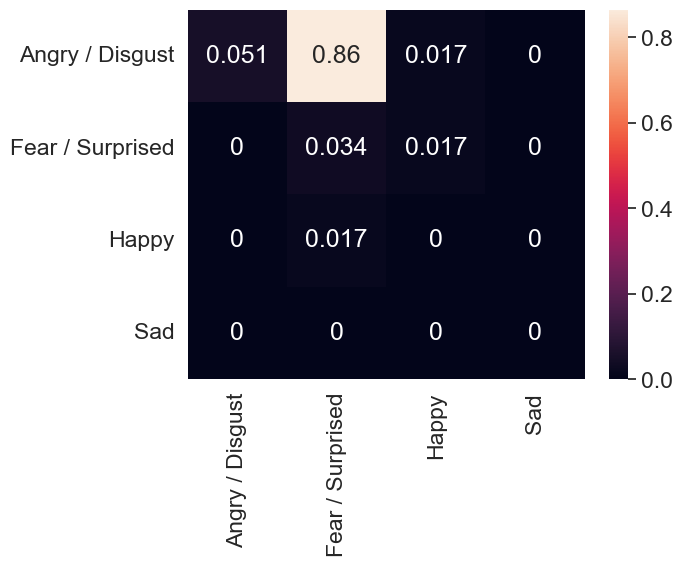

In [42]:
print(classification_report(res['given_tag'], res['vgg16'], digits=6, zero_division=0))
cm = confusion_matrix(res['given_tag'], res['vgg16'], labels=labels, normalize='all')
sns.heatmap(cm, annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels)

Joker:       

       accuracy                       0.090909        55
       macro avg   0.353741  0.346405  0.063619        55
    weighted avg   0.930612  0.090909  0.076277        55

Monpura:
        accuracy                       0.394737        38
       macro avg   0.348485  0.291667  0.212733        38
    weighted avg   0.450558  0.394737  0.283589        38

In [22]:
hubert_acc = (res['hubert'] == res['given_tag']).sum() / len(res)
hubert_acc

0.07272727272727272

In [23]:
vggish_acc = (res['vggish'] == res['given_tag']).sum() / len(res)
vggish_acc

0.12727272727272726